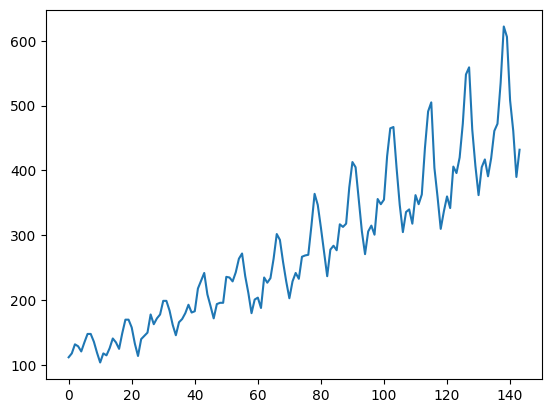

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers(1).csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [6]:
# load the dataset
dataframe = pd.read_csv('airline-passengers(1).csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 2s - 26ms/step - loss: 0.0738
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0369
Epoch 3/100
94/94 - 0s - 4ms/step - loss: 0.0258
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0225
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0209
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0195
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0183
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0172
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0161
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0150
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0140
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0131
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0122
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0113
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0104
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0096
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0089
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0081
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0074
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0068
Epoch 21

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Train Score: 22.80 RMSE
Test Score: 49.86 RMSE


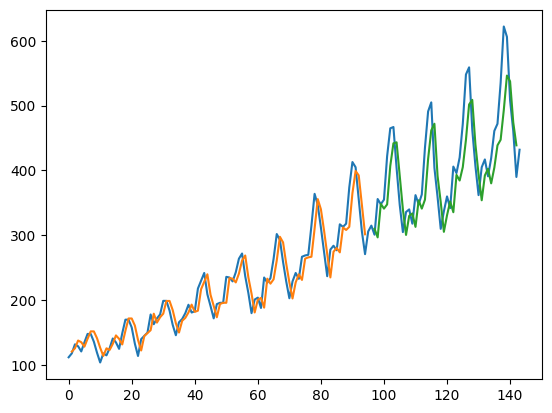

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 23ms/step - loss: 0.0408
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0206
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0153
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0139
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0131
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0122
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0113
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0104
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0095
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0086
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0076
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0068
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0059
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0052
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0045
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0039
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0034
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0030
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 21/100
94/94 -

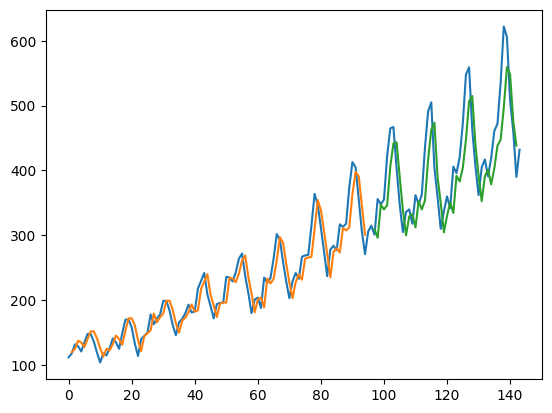

In [16]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers(1).csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()